# Project 1: SAT & ACT Analysis

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

In [1]:
#importing the usual culprits

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#reading in our final.csv merged file:

final = pd.read_csv('/Users/grahamlim/Documents/DSI15/lab_projects_copy/project_1/data/final.csv')

#removing the pesky unnamed column again:
final.drop(['Unnamed: 0'], axis=1, inplace = True)


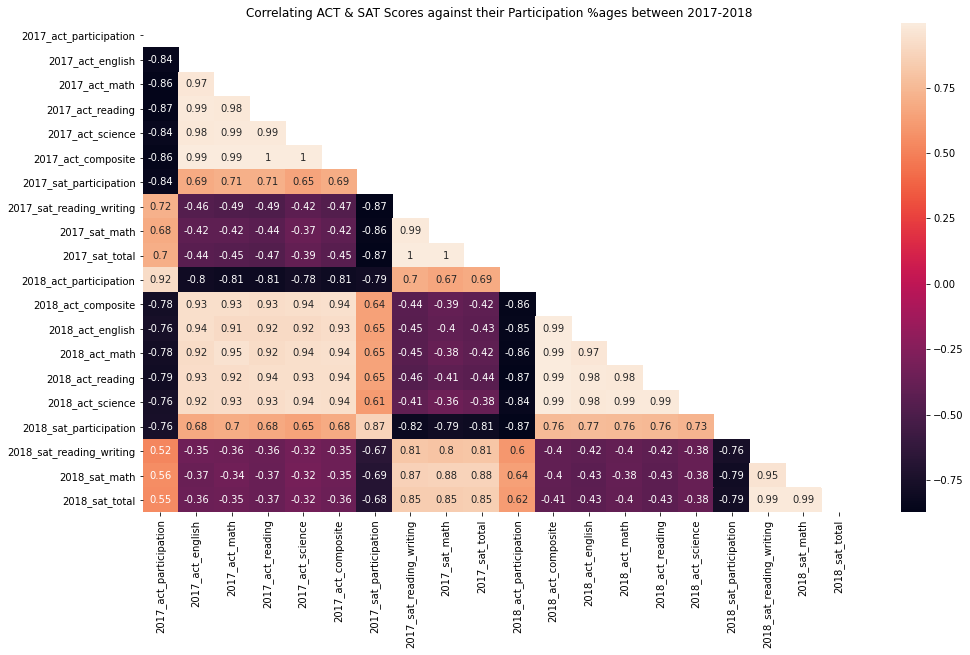

In [3]:
#Heatmap code - from GA vizlab class walkthru:

#figure size
plt.figure(figsize = (16,9))

#masking parameters, with mask 'True' in the upper triangle
corr = final.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True

#plotting the heatmap
ax1 = plt.axes()
sns.heatmap(corr, annot=True, mask = mask)


#labelling
ax1.set_title('Correlating ACT & SAT Scores against their Participation %ages between 2017-2018');

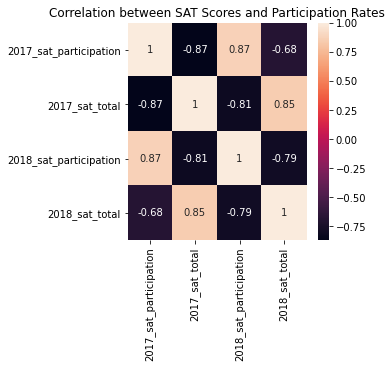

In [9]:
#Heatmap code - to visualize specific negative correlations between SAT scores and participation

#figure size
plt.figure(figsize = (4,4))

ax = sns.heatmap(final[['2017_sat_participation', 
                        '2017_sat_total', 
                        '2018_sat_participation', 
                        '2018_sat_total']].corr(), annot = True)

ax.set_title('Correlation between SAT Scores and Participation Rates');

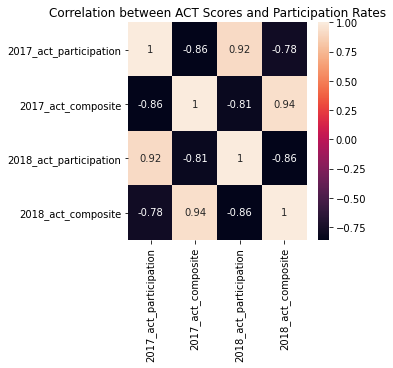

In [12]:
#Heatmap code - to visualize specific negative correlations between ACT scores and participation

#figure size
plt.figure(figsize = (4,4))

ax = sns.heatmap(final[['2017_act_participation', 
                        '2017_act_composite', 
                        '2018_act_participation', 
                        '2018_act_composite']].corr(), annot = True)

ax.set_title('Correlation between ACT Scores and Participation Rates');

In [13]:
#crafted this simple table for our group presentation.

final.sort_values('2017_sat_total',ascending=False)[['state','2017_sat_total', '2018_sat_total', '2017_sat_participation', '2018_sat_participation']].head(5)

#low participation States have disproportionately high scores because they tend to send their brightest students.
#top scoring States also have great education budgets, like Wisconsin

###source: https://blog.prepscholar.com/average-sat-and-act-scores-by-stated-adjusted-for-participation-rate

,state,2017_sat_total,2018_sat_total,2017_sat_participation,2018_sat_participation
23,Minnesota,1295,1298,3,4
49,Wisconsin,1291,1294,3,3
15,Iowa,1275,1265,2,3
25,Missouri,1271,1262,3,4
16,Kansas,1260,1265,4,4


#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [ ]:
def subplot_histograms(dataframe, columns_list, xlabels_list):
    nrows = int(np.ceil(len(columns_list)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize= (15,10)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    
    for i, column in enumerate(columns_list): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column])
        ax[i].set_title(f'{column}')
        ax[i].set_xlabel(xlabels_list[i])
        ax[i].axvline(dataframe[column].mean(), c ='r')

        # feel free to add more settings
        # Set titles, labels, etc here for each subplot

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

In [ ]:
# Code for Participation Rates Plotting

columns = ['2017_act_participation', '2017_sat_participation', '2018_act_participation', '2018_sat_participation']
xlabels = ['Participation Percentages','Participation Percentages','Participation Percentages','Participation Percentages']

subplot_histograms(final, columns, xlabels)

#The Histogram doesn't show any discernible trend or observable distribution.

In [ ]:
final.columns

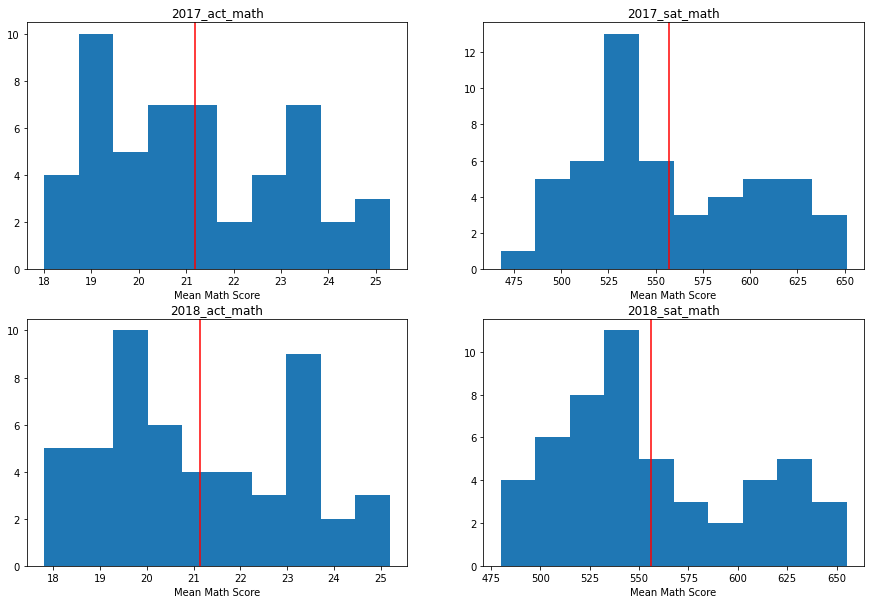

In [7]:
#Math scores for SAT & ACT Plotting 

columns = ['2017_act_math', '2017_sat_math', '2018_act_math', '2018_sat_math']
xlabels = ['Mean Math Score','Mean Math Score','Mean Math Score','Mean Math Score']

subplot_histograms(final, columns, xlabels)

#The Histogram doesn't show any discernible trend or observable distribution in ACT scores, 
#but 2017 SAT and 2018 SAT Math Scores have got two peaks.



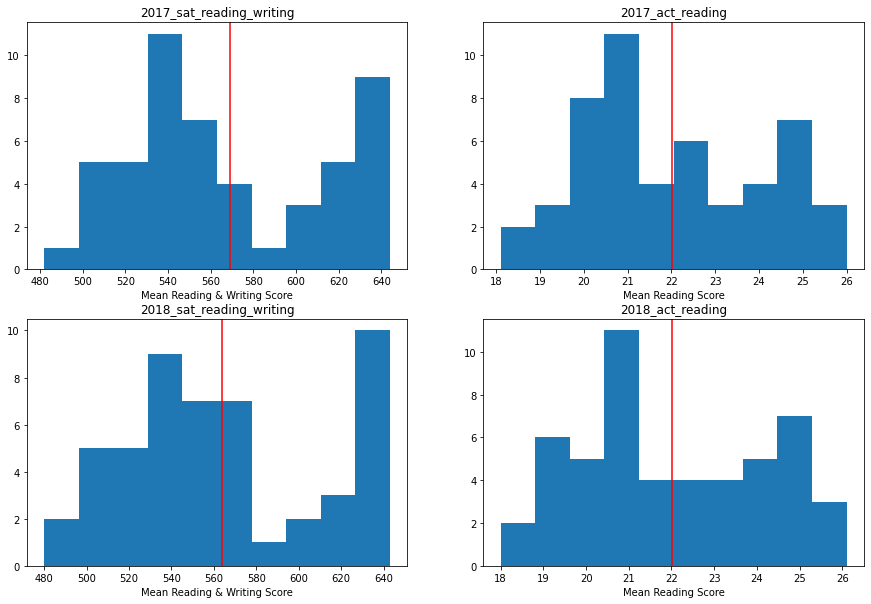

In [14]:
#Reading/verbal scores for SAT & ACT

columns = ['2017_sat_reading_writing','2017_act_reading','2018_sat_reading_writing', '2018_act_reading']
xlabels = ['Mean Reading & Writing Score','Mean Reading Score','Mean Reading & Writing Score','Mean Reading Score']

subplot_histograms(final, columns, xlabels)

#The Histogram doesn't show any outstandingly observable distribution in ACT scores, 
#although all histograms are vaguely twin-peaked



#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [19]:
#defining a scatterplot function based on class walkthrough - using Seaborn

def scatter(x, y, title, label_x, label_y, df= final):
    plt.figure(figsize=(15,8))
    x=df[x]
    y=df[y]
    
    sns.regplot(x,y)
    
    plt.title(title)
    plt.ylabel(label_y)
    plt.xlabel(label_x)

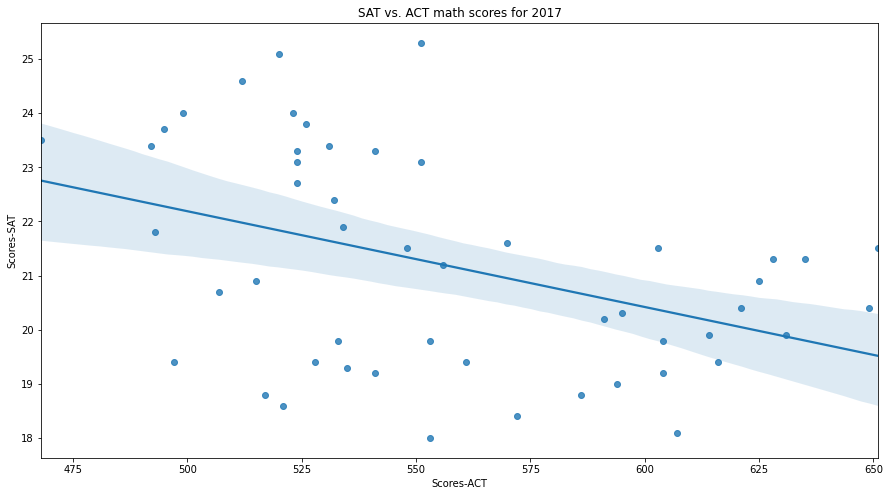

In [23]:
#SAT vs. ACT math scores for 2017

scatter('2017_sat_math', '2017_act_math', "SAT vs. ACT math scores for 2017", "Scores-SAT", "Scores-ACT")

#the scatterplot below shows a negative correlation between SAT and ACT math scores, which 

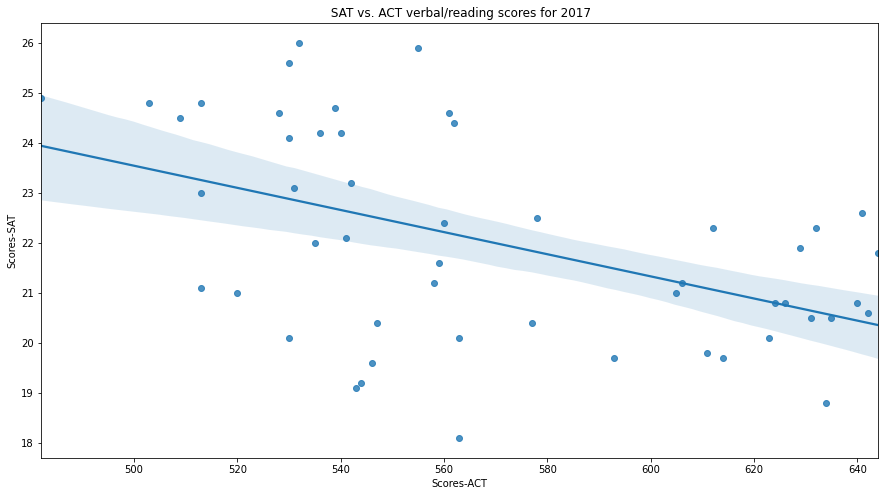

In [24]:
# SAT vs. ACT verbal/reading scores for 2017

scatter('2017_sat_reading_writing','2017_act_reading', " SAT vs. ACT verbal/reading scores for 2017", "Scores-SAT", "Scores-ACT")

#once again we see a negative correlation between the SAT Reading and Writing scores and the ACT Reading Scores for 2017.
#note that we do not include the ACT 'English' score even though it might actually look relevant.

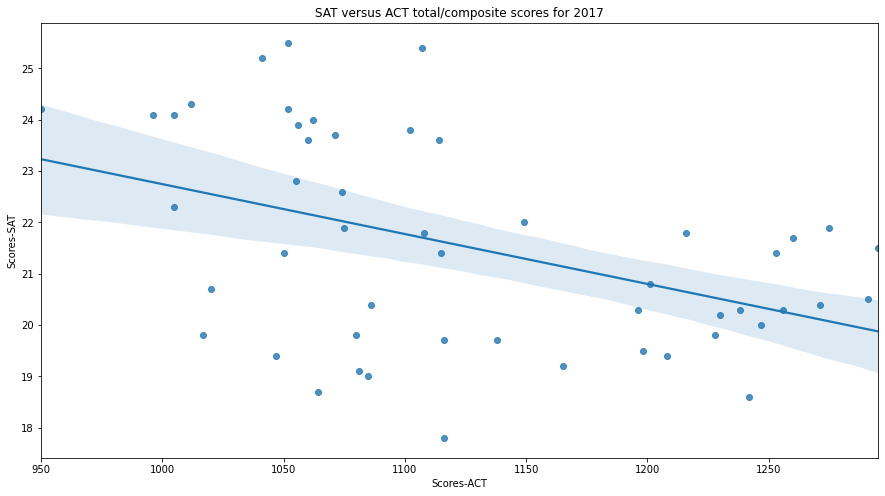

In [29]:
# SAT versus ACT total/composite scores for 2017

scatter('2017_sat_total','2017_act_composite','SAT versus ACT total/composite scores for 2017', 
        "Scores-SAT", "Scores-ACT")

#Yet another negative correlation in terms of total and composite scores for the SAT and ACT 2017
#makes sense because these scores simply sum up/average out the individual subject scores we already plotted

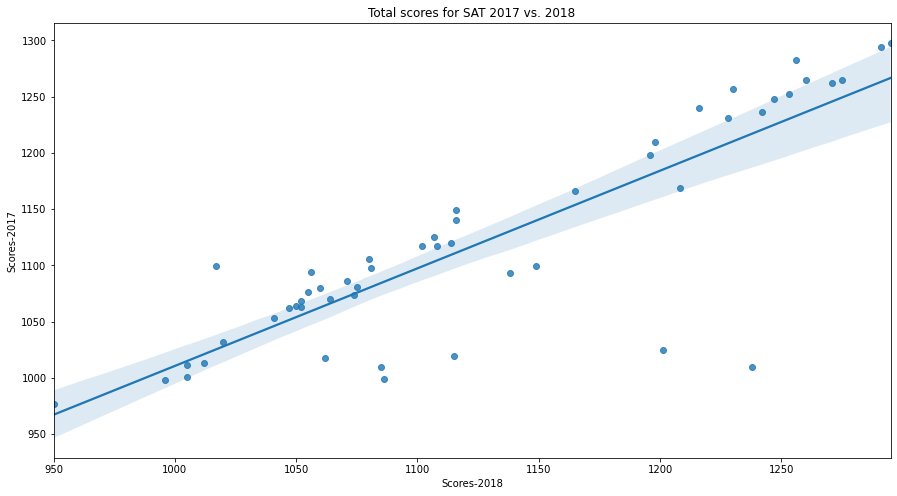

In [36]:
# Total scores for SAT 2017 vs. 2018

scatter('2017_sat_total','2018_sat_total', "Total scores for SAT 2017 vs. 2018", "Scores-2017", "Scores-2018")

#we see a positive correlation in SAT scores over the 2 years, with very little spread and a handful of outliers.

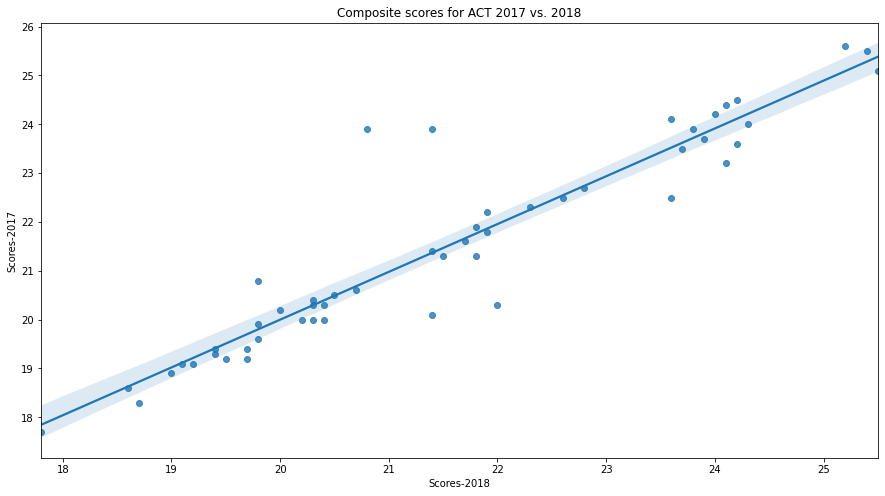

In [37]:
# Composite scores for ACT 2017 vs. 2018

scatter('2017_act_composite','2018_act_composite', "Composite scores for ACT 2017 vs. 2018", "Scores-2017", "Scores-2018")

#we see a positive correlation in ACT scores over the 2 years. The spread seems even tighter than the SAT yearly scatter.

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [39]:
#reminding myself all the column names

final.columns

Index(['state', '2017_act_participation', '2017_act_english', '2017_act_math',
       '2017_act_reading', '2017_act_science', '2017_act_composite',
       '2017_sat_participation', '2017_sat_reading_writing', '2017_sat_math',
       '2017_sat_total', '2018_act_participation', '2018_act_composite',
       '2018_act_english', '2018_act_math', '2018_act_reading',
       '2018_act_science', '2018_sat_participation',
       '2018_sat_reading_writing', '2018_sat_math', '2018_sat_total'],
      dtype='object')

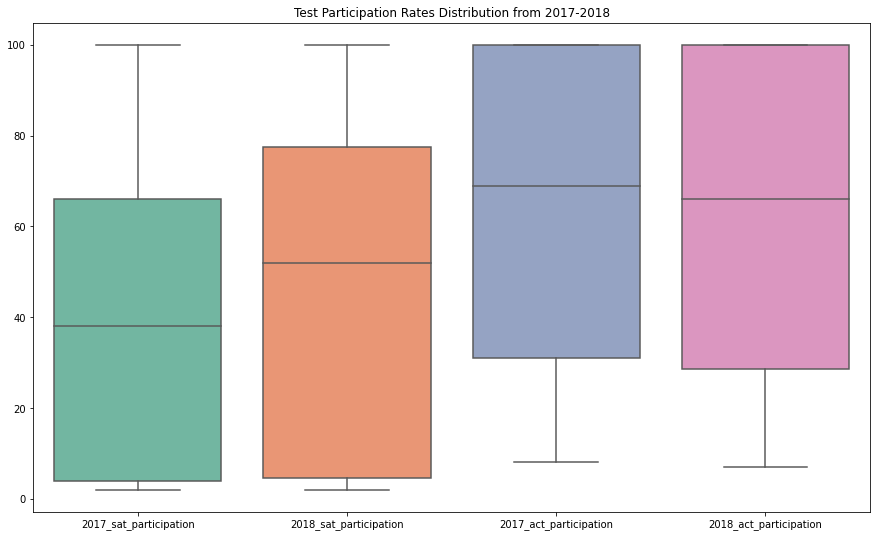

In [53]:
# Boxplot for Participation from 2017-2018 years in ACT and SAT

participation = final.loc[:,['2017_sat_participation','2018_sat_participation','2017_act_participation','2018_act_participation']]

plt.figure(figsize=(15,9))
plt.title('Test Participation Rates Distribution from 2017-2018')
sns.boxplot(data=participation,orient='v',palette='Set2');

#SAT participation is positively skewed whilst ACT participation is more negatively skewed 
#we had earlier found during Exploratory Data Analysis that ACT has stronger participation rates so this adds up.

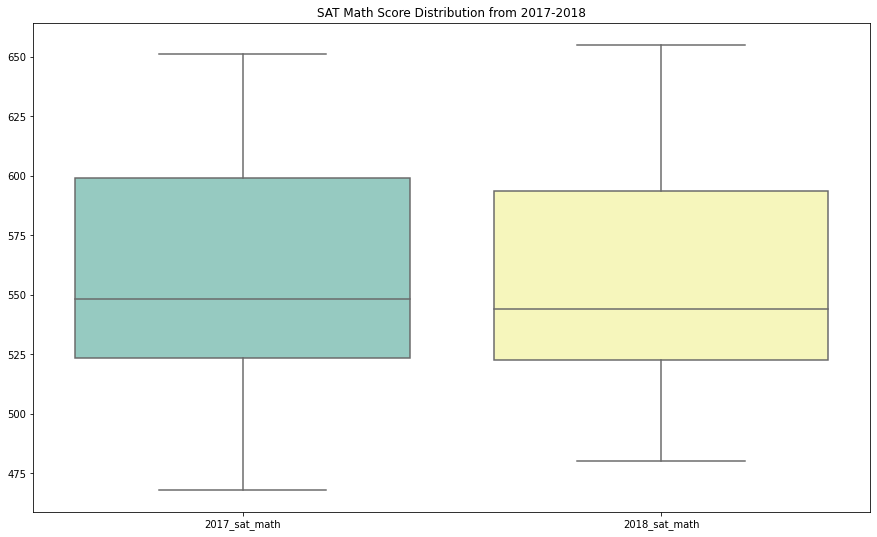

In [50]:
#Plotting all SAT math scores in boxplots

sat_math = final.loc[:,['2017_sat_math','2018_sat_math']]
plt.figure(figsize=(15,9))
plt.title('SAT Math Score Distribution from 2017-2018')
sns.boxplot(data=sat_math,orient='v',palette='Set3');

#over this period, the SAT math scores only slightly shifted towards a right skew 
#i.e. in 2018 majority of overall scores (IQR) dropped very slightly, but outliers were also slightly more extreme 

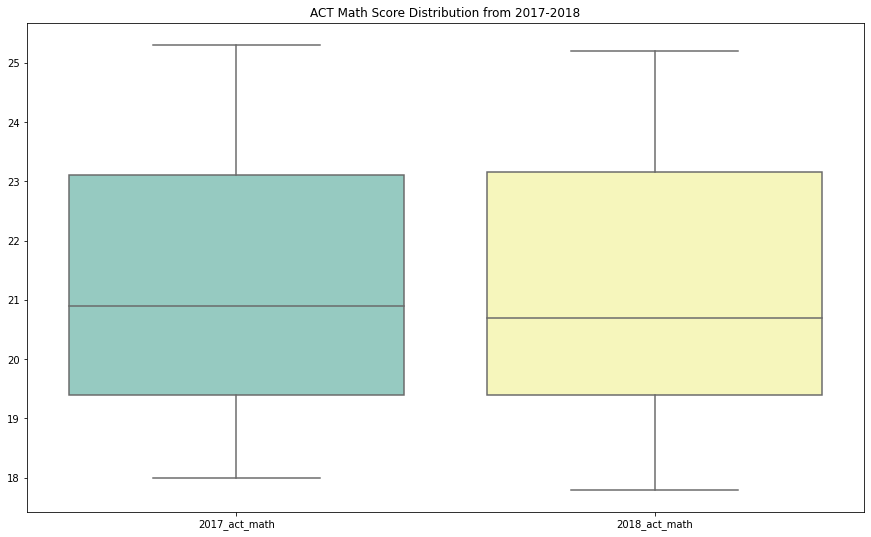

In [52]:
#plotting all ACT math scores in boxplots

act_math = final.loc[:,['2017_act_math','2018_act_math']]
plt.figure(figsize=(15,9))
plt.title('ACT Math Score Distribution from 2017-2018')
sns.boxplot(data=act_math,orient='v',palette='Set3');

#over this period, the ACT math scores distribution remained largely consistent.

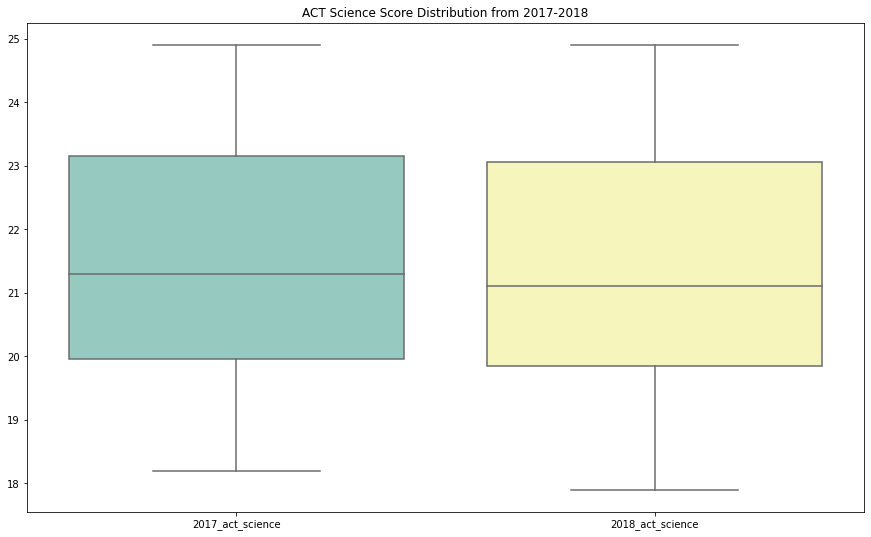

In [55]:
#plotting all ACT science scores in boxplots

act_sci = final.loc[:,['2017_act_science','2018_act_science']]
plt.figure(figsize=(15,9))
plt.title('ACT Science Score Distribution from 2017-2018')
sns.boxplot(data=act_sci,orient='v',palette='Set3');

#over this period, the ACT science scores distribution remained largely consistent.

In [57]:
#reminding myself of English and Reading related ACT scores:

final.columns

Index(['state', '2017_act_participation', '2017_act_english', '2017_act_math',
       '2017_act_reading', '2017_act_science', '2017_act_composite',
       '2017_sat_participation', '2017_sat_reading_writing', '2017_sat_math',
       '2017_sat_total', '2018_act_participation', '2018_act_composite',
       '2018_act_english', '2018_act_math', '2018_act_reading',
       '2018_act_science', '2018_sat_participation',
       '2018_sat_reading_writing', '2018_sat_math', '2018_sat_total'],
      dtype='object')

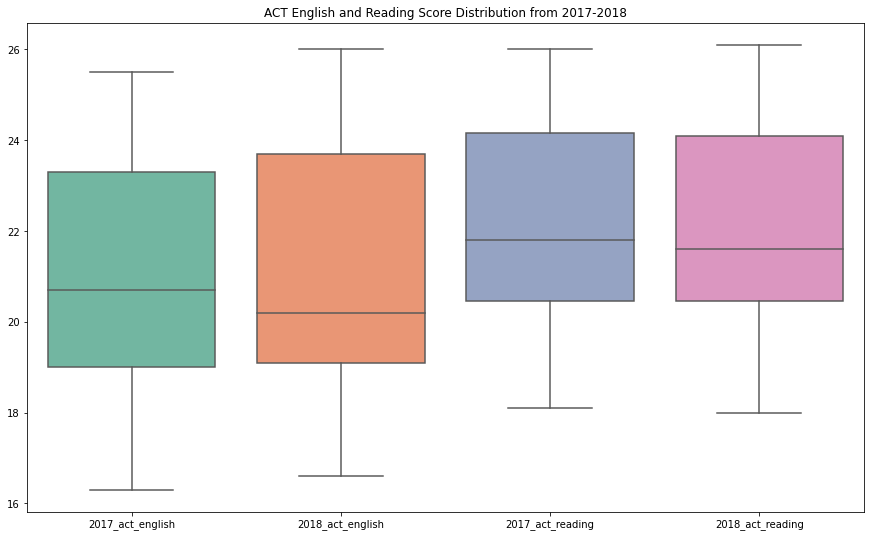

In [63]:
#plotting all ACT English and Reading scores in boxplots

act_eng_read = final.loc[:,['2017_act_english','2018_act_english', '2017_act_reading', '2018_act_reading']]
plt.figure(figsize=(15,9))
plt.title('ACT English and Reading Score Distribution from 2017-2018')
sns.boxplot(data=act_eng_read,orient='v',palette='Set2');

#over this period, the ACT reading scores remained largely unchanged,
#but the english scores had a higher range as well as a higher upper quartile score in 2018 over the previous year

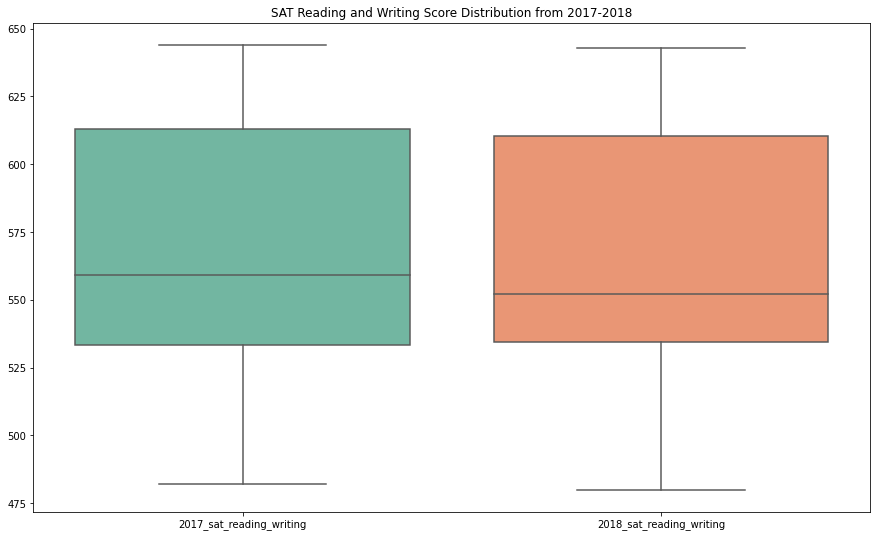

In [69]:
#plotting all SAT Reading & Writing scores in boxplots

sat_eng = final.loc[:,['2017_sat_reading_writing','2018_sat_reading_writing']]
plt.figure(figsize=(15,9))
plt.title('SAT Reading and Writing Score Distribution from 2017-2018')
sns.boxplot(data=sat_eng,orient='v',palette='Set2');

#over this period, the ACT reading scores remained largely unchanged,
#but the english scores had a higher range as well as a higher upper quartile score in 2018 over the previous year